#**IRIS FLOWER CLASSIFICATION**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

 **Exploratory Data Analysis (EDA)**

In [2]:
columns = ['Sepal length','Sepal width','Petal length','Petal width','Class']
dataset = pd.read_csv("iris.data",names=columns)
dataset.reset_index(drop="True")

,Sepal length,Sepal width,Petal length,Petal width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
dataset.head()

,Sepal length,Sepal width,Petal length,Petal width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


**Data Visualization**

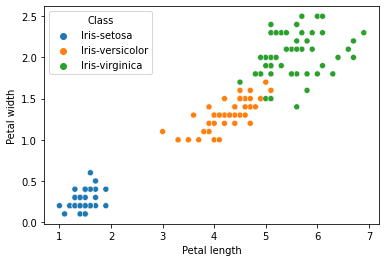

In [4]:
sns.scatterplot(x='Petal length',y='Petal width',data=dataset,hue='Class')

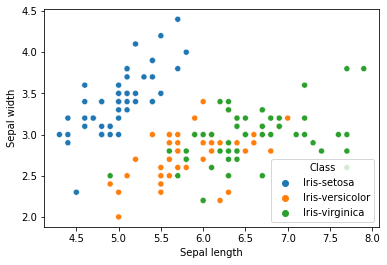

In [5]:
sns.scatterplot(x='Sepal length',y='Sepal width',data=dataset,hue='Class')

Text(69.0, 0.5, 'Actual')

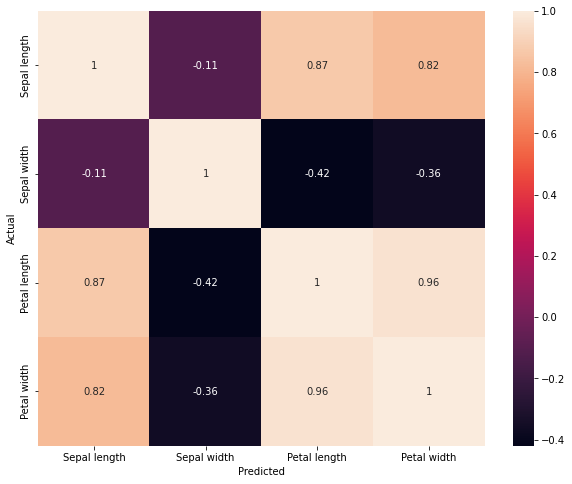

In [6]:
plt.figure(figsize=(10,8))
sns.heatmap(data=dataset.corr(),annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')

Text(0.5, 1.0, 'Count')

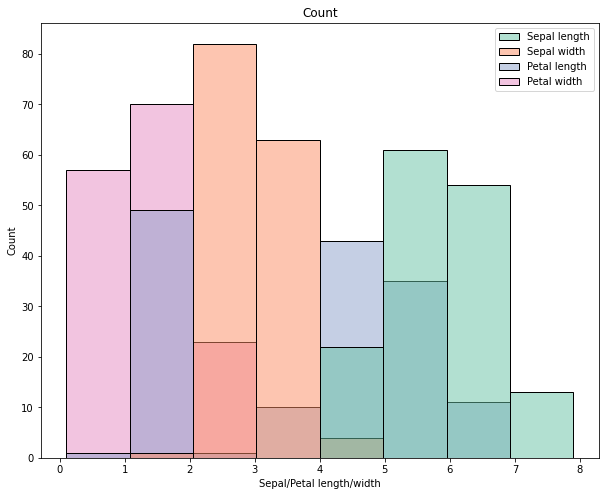

In [7]:
plt.figure(figsize=(10,8))
sns.histplot(data=dataset,bins=8,palette='Set2')
plt.xlabel('Sepal/Petal length/width')
plt.title('Count')

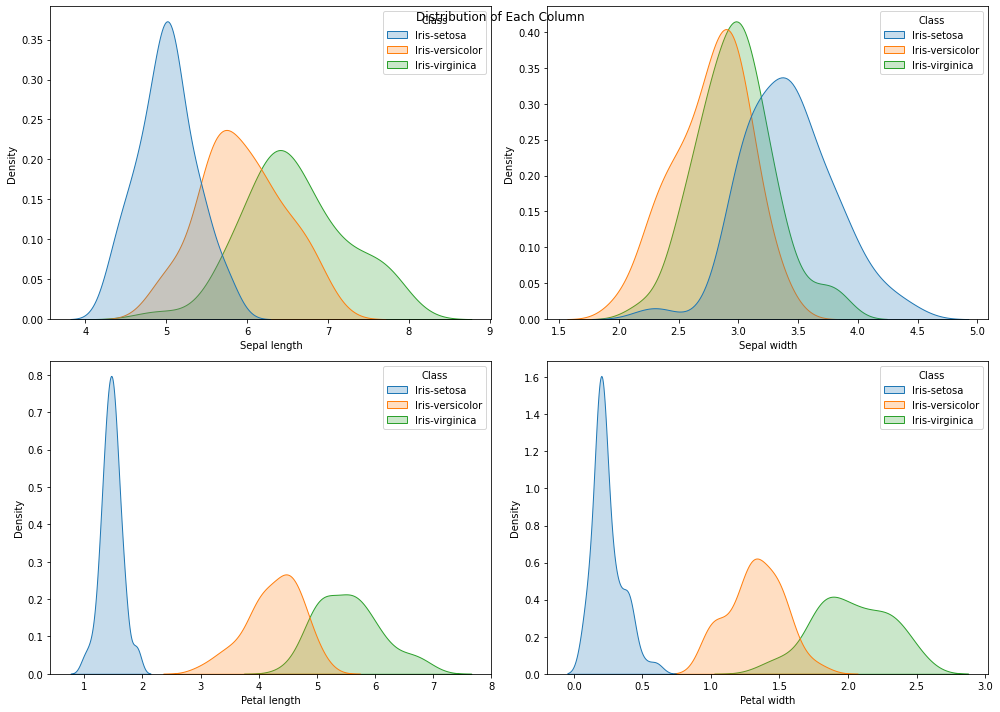

In [8]:
fig,axes = plt.subplots(figsize=(14,10),nrows=2,ncols=2)

plt.suptitle('Distribution of Each Column')
sns.kdeplot(data=dataset,x='Sepal length',hue='Class',shade=True,ax=axes[0][0])
sns.kdeplot(data=dataset,x='Sepal width',hue='Class',shade=True,ax=axes[0][1])
sns.kdeplot(data=dataset,x='Petal length',hue='Class',shade=True,ax=axes[1][0])
sns.kdeplot(data=dataset,x='Petal width',hue='Class',shade=True,ax=axes[1][1])
plt.tight_layout()
plt.show()

**Logistic Regression**

In [9]:
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 

In [10]:
X = dataset.drop('Class',axis=1)
y = dataset['Class']

In [11]:
X

,Sepal length,Sepal width,Petal length,Petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [12]:
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Class, Length: 150, dtype: object

In [13]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train

,Sepal length,Sepal width,Petal length,Petal width
22,4.6,3.6,1.0,0.2
15,5.7,4.4,1.5,0.4
65,6.7,3.1,4.4,1.4
11,4.8,3.4,1.6,0.2
42,4.4,3.2,1.3,0.2
...,...,...,...,...
71,6.1,2.8,4.0,1.3
106,4.9,2.5,4.5,1.7
14,5.8,4.0,1.2,0.2
92,5.8,2.6,4.0,1.2


In [14]:
X_test.head()

,Sepal length,Sepal width,Petal length,Petal width
73,6.1,2.8,4.7,1.2
18,5.7,3.8,1.7,0.3
118,7.7,2.6,6.9,2.3
78,6.0,2.9,4.5,1.5
76,6.8,2.8,4.8,1.4


In [15]:
y_test
y_train

22         Iris-setosa
15         Iris-setosa
65     Iris-versicolor
11         Iris-setosa
42         Iris-setosa
            ...       
71     Iris-versicolor
106     Iris-virginica
14         Iris-setosa
92     Iris-versicolor
102     Iris-virginica
Name: Class, Length: 120, dtype: object

In [16]:
model = LogisticRegression()
model.fit(X,y)

LogisticRegression()

In [17]:
model.coef_

array([[-0.42339954,  0.96170963, -2.5195144 , -1.08594123],
       [ 0.53415033, -0.3179707 , -0.20537656, -0.93966834],
       [-0.11075079, -0.64373893,  2.72489096,  2.02560957]])

In [18]:
model.intercept_

array([  9.88126443,   2.21931668, -12.1005811 ])

In [19]:
y_pred = model.predict(X_test)
y_pred

array(['Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa'], dtype=object)

In [20]:
from sklearn.metrics import confusion_matrix

In [21]:
conf = confusion_matrix(y_test,y_pred)
conf

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]])

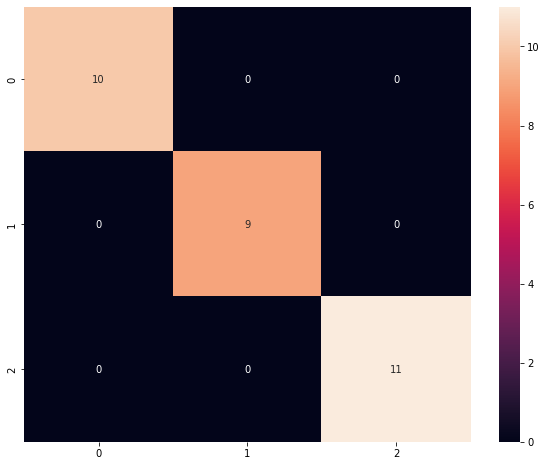

In [22]:
plt.figure(figsize=(10,8))
sns.heatmap(data=conf,annot=True)

In [23]:
model.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [24]:
y_pred

array(['Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa'], dtype=object)

In [25]:
y_test

73     Iris-versicolor
18         Iris-setosa
118     Iris-virginica
78     Iris-versicolor
76     Iris-versicolor
31         Iris-setosa
64     Iris-versicolor
141     Iris-virginica
68     Iris-versicolor
82     Iris-versicolor
110     Iris-virginica
12         Iris-setosa
36         Iris-setosa
9          Iris-setosa
19         Iris-setosa
56     Iris-versicolor
104     Iris-virginica
69     Iris-versicolor
55     Iris-versicolor
132     Iris-virginica
29         Iris-setosa
127     Iris-virginica
26         Iris-setosa
128     Iris-virginica
131     Iris-virginica
145     Iris-virginica
108     Iris-virginica
143     Iris-virginica
45         Iris-setosa
30         Iris-setosa
Name: Class, dtype: object

**Scores**

In [26]:
print("Score = ",model.score(X,y)*100,"%")

Score =  97.33333333333334 %


In [27]:
print("Score = ",model.score(X_train,y_train)*100,"%")

Score =  96.66666666666667 %
